# S09 T01 feature engineering

## Dataset de datos deportivos
Datos de deportistas de los Juegos Olímpicos de 2016

In [540]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import numpy as np
from datetime import timedelta, date
# funcion para estandarizar atributos
from sklearn.preprocessing import StandardScaler
# funciones para normalizar atributos
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler, PowerTransformer

In [541]:
# Cargo un dataset de atletas de los juegos olímpicos 2016 con sus medallas
df = pd.read_csv("athletes.csv")
df.head(10)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
5,173071782,Aaron Royle,AUS,male,1/26/90,1.80,67.0,triathlon,0,0,0
6,266237702,Aaron Russell,USA,male,6/4/93,2.05,98.0,volleyball,0,0,1
7,382571888,Aaron Younger,AUS,male,9/25/91,1.93,100.0,aquatics,0,0,0
8,87689776,Aauri Lorena Bokesa,ESP,female,12/14/88,1.80,62.0,athletics,0,0,0
9,997877719,Ababel Yeshaneh,ETH,female,7/22/91,1.65,54.0,athletics,0,0,0


El dataset de los Juegos Olímpicos de 2016 tiene datos de 11538 deportistas 

In [542]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [543]:
df = df.drop_duplicates()
# no habia duplicados

In [544]:
# hay un único registro que no tiene fecha de nacimiento así que lo elimino
df = df.drop(df.loc[df['dob'].isnull()].index)

In [545]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11537 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11537 non-null  int64  
 1   name         11537 non-null  object 
 2   nationality  11537 non-null  object 
 3   sex          11537 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11537 non-null  object 
 8   gold         11537 non-null  int64  
 9   silver       11537 non-null  int64  
 10  bronze       11537 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1.1+ MB


<AxesSubplot:xlabel='sport', ylabel='count'>

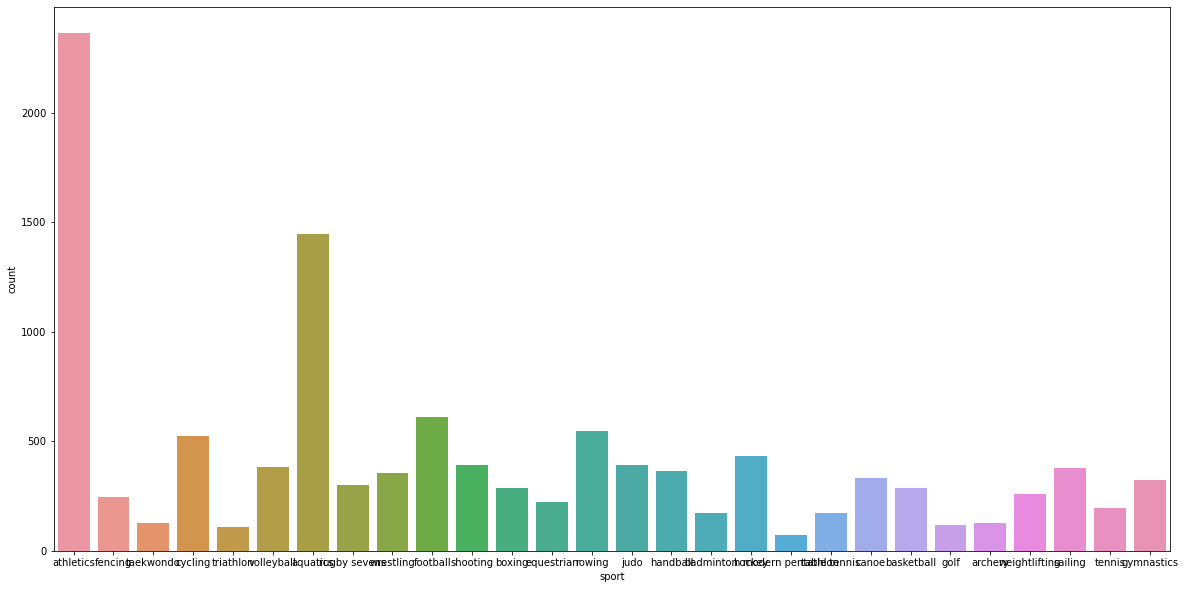

In [546]:
# Veo cuantos deportes distintos participaron

plt.figure(figsize=(20,10))
sns.countplot(x='sport', data=df)


In [547]:
df['sport'].unique()

array(['athletics', 'fencing', 'taekwondo', 'cycling', 'triathlon',
       'volleyball', 'aquatics', 'rugby sevens', 'wrestling', 'football',
       'shooting', 'boxing', 'equestrian', 'rowing', 'judo', 'handball',
       'badminton', 'hockey', 'modern pentathlon', 'table tennis',
       'canoe', 'basketball', 'golf', 'archery', 'weightlifting',
       'sailing', 'tennis', 'gymnastics'], dtype=object)

In [548]:
len(df['sport'].unique())

28

In [549]:
df['dob'] = pd.to_datetime(df['dob'])
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,2069-10-17,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0


In [550]:
# en algunas fechas, como por ejemplo año 69, el to_datetime convirtió a 2069 en vez de 1069 
future = df['dob'] > pd.to_datetime('2016/01/01')
df.loc[future, 'dob'] -= timedelta(days=365.25*100)

# Caclculo una columna edad
df['age'] = 2016 - df['dob'].dt.year
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age
0,736041664,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0,47
1,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0,30
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1,24
3,521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0,25
4,33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0,26


In [551]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11537 entries, 0 to 11537
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           11537 non-null  int64         
 1   name         11537 non-null  object        
 2   nationality  11537 non-null  object        
 3   sex          11537 non-null  object        
 4   dob          11537 non-null  datetime64[ns]
 5   height       11208 non-null  float64       
 6   weight       10879 non-null  float64       
 7   sport        11537 non-null  object        
 8   gold         11537 non-null  int64         
 9   silver       11537 non-null  int64         
 10  bronze       11537 non-null  int64         
 11  age          11537 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 1.4+ MB


Sólo hay Nan en height y weight, los completo con las medianas

In [552]:
mhf = round(df['height'].loc[(df.sex=='female')].median(),2)
mhm = round(df['height'].loc[(df.sex=='male')].median(),2)
mwf = round(df['weight'].loc[(df.sex=='female')].median(),2)
mwm = round(df['weight'].loc[(df.sex=='male')].median(),2)

print('La mediana de height para mujeres es: ', mhf)
print('La mediana de height para hombres es: ', mhm)

print('La mediana de weight para mujeres es: ', mwf)
print('La mediana de weight para hombres es: ', mwm)

La mediana de height para mujeres es:  1.7
La mediana de height para hombres es:  1.82
La mediana de weight para mujeres es:  61.0
La mediana de weight para hombres es:  78.0


In [553]:
# Calculo las observaciones que tienen height sin datos
df.loc[df['height'].isnull()]

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age
12,258556239,Abbas Qali,IOA,male,1992-10-11,NaN,NaN,aquatics,0,0,0,24
47,469953606,Abdoullah Bamoussa,ITA,male,1986-06-08,NaN,NaN,athletics,0,0,0,30
50,325809293,Abdul Omar,GHA,male,1993-10-03,NaN,NaN,boxing,0,0,0,23
52,262868423,Abdulaziz Alshatti,IOA,male,1990-10-30,NaN,NaN,fencing,0,0,0,26
56,897549624,Abdullah Hel Baki,BAN,male,1989-08-01,NaN,NaN,shooting,0,0,0,27
...,...,...,...,...,...,...,...,...,...,...,...,...
11031,404382792,Winston Hill,FIJ,male,1993-09-17,NaN,NaN,boxing,0,0,0,23
11208,550672127,Yemane Haileselassie,ERI,male,1998-02-21,NaN,NaN,athletics,0,0,0,18
11220,5964702,Yesenia Miranda,ESA,female,1994-03-26,NaN,NaN,athletics,0,0,0,22
11238,390260480,Yigal Kopinsky,SUR,male,1985-10-16,NaN,NaN,judo,0,0,0,31


In [554]:
# Divido el dataframe para trabajar con hombres y mujeres
dfm = df.loc[df.sex=='male']
dff = df.loc[df.sex=='female']

# Reemplazo los Nan por las medias
dff.fillna(dff.median(), inplace=True)
dfm.fillna(dfm.median(), inplace=True)
df = pd.concat([dff, dfm], ignore_index=True)

df


<ipython-input-554-70bf752e6e6a>:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  dff.fillna(dff.median(), inplace=True)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-554-70bf752e6e6a>:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  dfm.fillna(dfm.median(), inplace=True)


,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age
0,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0,30
1,87689776,Aauri Lorena Bokesa,ESP,female,1988-12-14,1.80,62.0,athletics,0,0,0,28
2,997877719,Ababel Yeshaneh,ETH,female,1991-07-22,1.65,54.0,athletics,0,0,0,25
3,376068084,Abbey D'Agostino,USA,female,1992-05-25,1.61,49.0,athletics,0,0,0,24
4,162792594,Abbey Weitzeil,USA,female,1996-12-03,1.78,68.0,aquatics,1,1,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...
11532,600541319,Zurabi Datunashvili,GEO,male,1991-06-18,1.83,75.0,wrestling,0,0,0,25
11533,801825063,Zurabi Iakobishvili,GEO,male,1992-02-04,1.71,68.0,wrestling,0,0,0,24
11534,88361042,di Xiao,CHN,male,1991-05-14,1.85,100.0,wrestling,0,0,0,25
11535,900065925,le Quoc Toan Tran,VIE,male,1989-04-05,1.60,56.0,weightlifting,0,0,0,27


In [555]:
# sigo teniendo la misma mediana
print('La media de height para mujeres es: ', round(df['height'].loc[(df.sex=='female')].median(),2))

La media de height para mujeres es:  1.7


In [556]:
# No tengo más observaciones con Nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11537 entries, 0 to 11536
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           11537 non-null  int64         
 1   name         11537 non-null  object        
 2   nationality  11537 non-null  object        
 3   sex          11537 non-null  object        
 4   dob          11537 non-null  datetime64[ns]
 5   height       11537 non-null  float64       
 6   weight       11537 non-null  float64       
 7   sport        11537 non-null  object        
 8   gold         11537 non-null  int64         
 9   silver       11537 non-null  int64         
 10  bronze       11537 non-null  int64         
 11  age          11537 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 1.1+ MB


In [557]:
df['age'].unique()

array([30, 28, 25, 24, 20, 27, 26, 29, 22, 23, 37, 18, 35, 16, 38, 17, 33,
       31, 36, 21, 40, 19, 34, 15, 32, 45, 39, 14, 50, 48, 41, 44, 47, 42,
       51, 53, 43, 52, 54, 62, 46, 57, 58, 60, 49, 55, 61, 56, 59],
      dtype=int64)

In [558]:
# Hago un binning por grupos de edades
bins = [0, 22, 30, 100]
labels = ['adolescente','joven','mayor']
df['rango'] = pd.cut(df['age'], bins=bins, labels=labels)

df

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age,rango
0,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0,30,joven
1,87689776,Aauri Lorena Bokesa,ESP,female,1988-12-14,1.80,62.0,athletics,0,0,0,28,joven
2,997877719,Ababel Yeshaneh,ETH,female,1991-07-22,1.65,54.0,athletics,0,0,0,25,joven
3,376068084,Abbey D'Agostino,USA,female,1992-05-25,1.61,49.0,athletics,0,0,0,24,joven
4,162792594,Abbey Weitzeil,USA,female,1996-12-03,1.78,68.0,aquatics,1,1,0,20,adolescente
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,600541319,Zurabi Datunashvili,GEO,male,1991-06-18,1.83,75.0,wrestling,0,0,0,25,joven
11533,801825063,Zurabi Iakobishvili,GEO,male,1992-02-04,1.71,68.0,wrestling,0,0,0,24,joven
11534,88361042,di Xiao,CHN,male,1991-05-14,1.85,100.0,wrestling,0,0,0,25,joven
11535,900065925,le Quoc Toan Tran,VIE,male,1989-04-05,1.60,56.0,weightlifting,0,0,0,27,joven


<AxesSubplot:xlabel='rango', ylabel='count'>

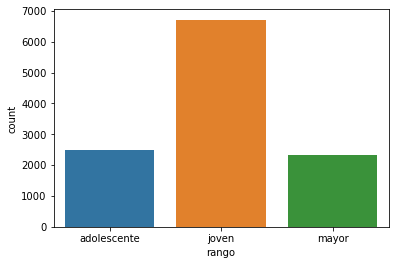

In [559]:
sns.countplot(x='rango', data=df)


In [560]:
# Guardo una copia de este df preprocesado para no perderlo
df_prep = df.copy()


## Exercici 1
Normalizar atributos categóricos en dummy

In [561]:
fm = pd.get_dummies(df['sex'])


In [562]:
df = pd.concat([df, fm], axis=1)
df = df.drop(['sex'], axis =1)

In [563]:
rangos = pd.get_dummies(df['rango'])
df = pd.concat([df, rangos], axis=1)
df = df.drop(['rango'], axis =1)

In [564]:
# inicializar el Scaler
ss = StandardScaler()
# transformar los datos
Xstd = ss.fit_transform(df[['height','weight','age']].values)

In [565]:
Xstd

array([[-0.77428281, -1.01854747,  0.61405878],
       [ 0.30150585, -0.63927758,  0.24221351],
       [-1.04322997, -1.14497076, -0.3155544 ],
       ...,
       [ 0.74975112,  1.76276504, -0.3155544 ],
       [-1.49147524, -1.01854747,  0.05629087],
       [ 0.74975112, -0.1335844 , -0.50147704]])

In [566]:
Xstd = pd.DataFrame(Xstd)
df = pd.concat([df, Xstd], axis=1)



In [567]:
df = df.drop(['height','weight','age'], axis =1)

In [568]:
df = df.rename(columns={df.columns[13]: "height", df.columns[14]: "weight", df.columns[15]: "age"})
df

,id,name,nationality,dob,sport,gold,silver,bronze,female,male,adolescente,joven,mayor,height,weight,age
0,532037425,A Lam Shin,KOR,1986-09-23,fencing,0,0,0,1,0,0,1,0,-0.774283,-1.018547,0.614059
1,87689776,Aauri Lorena Bokesa,ESP,1988-12-14,athletics,0,0,0,1,0,0,1,0,0.301506,-0.639278,0.242214
2,997877719,Ababel Yeshaneh,ETH,1991-07-22,athletics,0,0,0,1,0,0,1,0,-1.043230,-1.144971,-0.315554
3,376068084,Abbey D'Agostino,USA,1992-05-25,athletics,0,0,0,1,0,0,1,0,-1.401826,-1.461029,-0.501477
4,162792594,Abbey Weitzeil,USA,1996-12-03,aquatics,1,1,0,1,0,1,0,0,0.122208,-0.260008,-1.245168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,600541319,Zurabi Datunashvili,GEO,1991-06-18,wrestling,0,0,0,0,1,0,1,0,0.570453,0.182474,-0.315554
11533,801825063,Zurabi Iakobishvili,GEO,1992-02-04,wrestling,0,0,0,0,1,0,1,0,-0.505336,-0.260008,-0.501477
11534,88361042,di Xiao,CHN,1991-05-14,wrestling,0,0,0,0,1,0,1,0,0.749751,1.762765,-0.315554
11535,900065925,le Quoc Toan Tran,VIE,1989-04-05,weightlifting,0,0,0,0,1,0,1,0,-1.491475,-1.018547,0.056291


## Exercici 2
Aplicar el análisis de componentes principales

Me gustaría estimar, a partir del sexo, peso, altura y edad de un deportista la probabilidad de sacar una medalla de oro. Pero necesito realmente todas esas variables? Aplico PCA a las variables numéricas

In [569]:
df.head()

,id,name,nationality,dob,sport,gold,silver,bronze,female,male,adolescente,joven,mayor,height,weight,age
0,532037425,A Lam Shin,KOR,1986-09-23,fencing,0,0,0,1,0,0,1,0,-0.774283,-1.018547,0.614059
1,87689776,Aauri Lorena Bokesa,ESP,1988-12-14,athletics,0,0,0,1,0,0,1,0,0.301506,-0.639278,0.242214
2,997877719,Ababel Yeshaneh,ETH,1991-07-22,athletics,0,0,0,1,0,0,1,0,-1.043230,-1.144971,-0.315554
3,376068084,Abbey D'Agostino,USA,1992-05-25,athletics,0,0,0,1,0,0,1,0,-1.401826,-1.461029,-0.501477
4,162792594,Abbey Weitzeil,USA,1996-12-03,aquatics,1,1,0,1,0,1,0,0,0.122208,-0.260008,-1.245168


Un requerimiento de PCA es que los datos estén estandarizados. Pero ya lo hice en el ejercicio anterior.

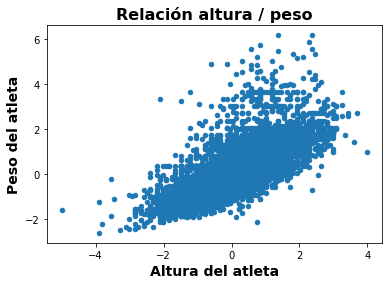

In [570]:
# Si quiero visualizar las med  allas de bronce a partir de altura y peso:
fig = df.plot(kind = 'scatter', x='height', y='weight')
fig.set_title('Relación altura / peso', fontsize=16, weight="bold")
fig.set_xlabel("Altura del atleta", fontsize=14, weight = "bold")
fig.set_ylabel('Peso del atleta',  fontsize=14, weight="bold")
plt.show()

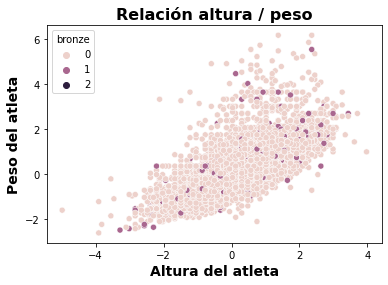

In [571]:
# Si agrego cuales tuvieron medalla de bronce:
fig = sns.scatterplot(data=df, x="height", y="weight", hue="bronze")
fig.set_title('Relación altura / peso', fontsize=16, weight="bold")
fig.set_xlabel("Altura del atleta", fontsize=14, weight = "bold")
fig.set_ylabel('Peso del atleta',  fontsize=14, weight="bold")
plt.show()

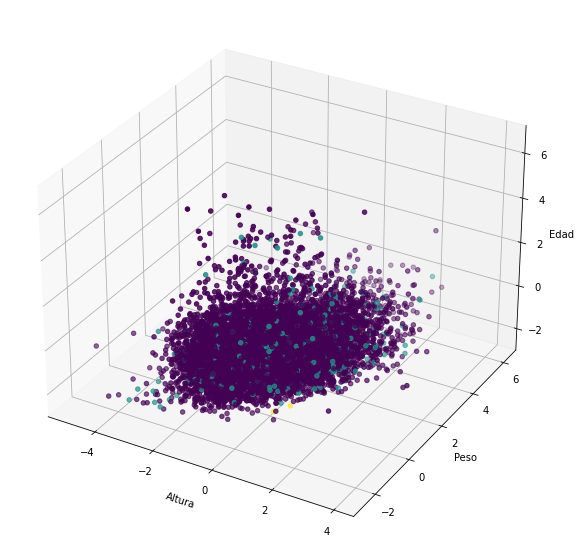

In [572]:
# Si agrego el dato de la edad:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['height'], df['weight'], df['age'], c=df['bronze'])
ax.set_xlabel('Altura')
ax.set_ylabel('Peso')
ax.set_zlabel('Edad')
plt.show()

In [573]:
# Voy a bajar la dimensionalidad en 1 para poder tener un gráfico mejor
features = ['height', 'weight', 'age']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['bronze']].values
x

array([[-0.77428281, -1.01854747,  0.61405878],
       [ 0.30150585, -0.63927758,  0.24221351],
       [-1.04322997, -1.14497076, -0.3155544 ],
       ...,
       [ 0.74975112,  1.76276504, -0.3155544 ],
       [-1.49147524, -1.01854747,  0.05629087],
       [ 0.74975112, -0.1335844 , -0.50147704]])

In [574]:
# aplico PCA para reducir una dimensión
from sklearn.decomposition import PCA
# creo una instancia diciendo que voy a querer 2 componentes
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

In [575]:
finalDf = pd.concat([principalDf, df[['bronze']]], axis = 1)
finalDf


,pc1,pc2,bronze
0,-1.155957,0.799344,0
1,-0.199559,0.253912,0
2,-1.577835,-0.070824,0
3,-2.078092,-0.178358,0
4,-0.292554,-1.222877,0
...,...,...,...
11532,0.475496,-0.404441,0
11533,-0.612788,-0.404024,0
11534,1.706846,-0.566142,0
11535,-1.743092,0.345785,0


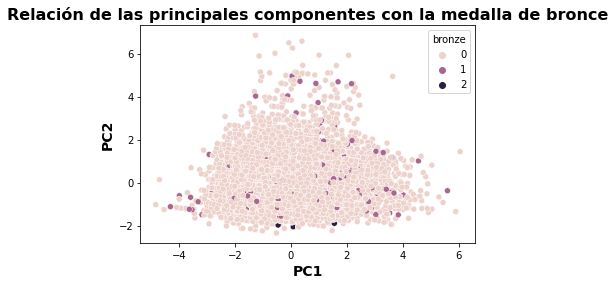

In [576]:
# repito el gráfico en 2 dimensiones
fig = sns.scatterplot(data=finalDf, x="pc1", y="pc2", hue="bronze")
fig.set_title('Relación de las principales componentes con la medalla de bronce', fontsize=16, weight="bold")
fig.set_xlabel("PC1", fontsize=14, weight = "bold")
fig.set_ylabel('PC2',  fontsize=14, weight="bold")
plt.show()

A primera vista pareciera que no hay relación entre las tres variables medidas y ganar una medalla de bronce... Pero es fiable este gráfico? 


In [577]:
# Explained variance ratio
print(f'Explained variance ratio:')
print(*[f'PC{i+1}: {100*x:.3f}%' for i, x in enumerate(pca.explained_variance_ratio_)], sep=', ')

Explained variance ratio:
PC1: 58.980%, PC2: 32.713%


Estas dos variables numéricas no llegan a reflejar el 92% de la variabilidad (58.92 + 32.72 = 91.64), por lo tanto la reducción de dimensión no nos sirve, y debemos conservar las 3 variables.


In [578]:
x

array([[-0.77428281, -1.01854747,  0.61405878],
       [ 0.30150585, -0.63927758,  0.24221351],
       [-1.04322997, -1.14497076, -0.3155544 ],
       ...,
       [ 0.74975112,  1.76276504, -0.3155544 ],
       [-1.49147524, -1.01854747,  0.05629087],
       [ 0.74975112, -0.1335844 , -0.50147704]])

In [579]:
# visto de otra manera, consultamos cuántos factores se necesita conservar:
pca2 = PCA(.95)
train_img = pca2.fit_transform(x)

pca2.explained_variance_ratio_



array([0.58979844, 0.32713376, 0.0830678 ])

Para conservar el 95% de la variabilidad necesitamos los 3 atributos

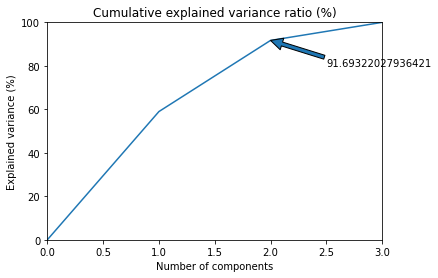

In [580]:
# Cumulative explained variance ratio
x = range(0,4)
y = np.pad(np.cumsum(pca2.explained_variance_ratio_), (1,0))*100
plt.plot(x,y)
plt.xlim(0,3);
plt.ylim(0,100);
plt.xlabel('Number of components');
plt.annotate(y[2], (x[2], y[2]), (2.5,80), arrowprops = dict())
plt.title('Cumulative explained variance ratio (%)');
plt.ylabel('Explained variance (%)');


In [581]:
train_img

array([[-1.15595686,  0.7993444 , -0.19706157],
       [-0.19955887,  0.25391215, -0.67376098],
       [-1.57783468, -0.07082366, -0.06544569],
       ...,
       [ 1.70684583, -0.5661424 ,  0.73157502],
       [-1.74309169,  0.34578511,  0.3273683 ],
       [ 0.34986952, -0.58469115, -0.60595242]])

In [582]:
pca_columns = [f'PCA_{x}' for x in range(1, 4)]
df_pca = pd.DataFrame(train_img, columns=pca_columns)
df_pca

,PCA_1,PCA_2,PCA_3
0,-1.155957,0.799344,-0.197062
1,-0.199559,0.253912,-0.673761
2,-1.577835,-0.070824,-0.065446
3,-2.078092,-0.178358,-0.030375
4,-0.292554,-1.222877,-0.227957
...,...,...,...
11532,0.475496,-0.404441,-0.261953
11533,-0.612788,-0.404024,0.188954
11534,1.706846,-0.566142,0.731575
11535,-1.743092,0.345785,0.327368


## Exercici 3
Normalizando con outliers

Analizo los outliers para ver si tiene sentido borrarlos

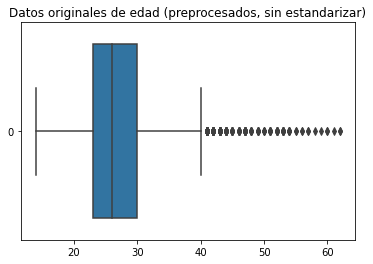

In [583]:
sns.boxplot(data=df_prep['age'], orient='h');
plt.title('Datos originales de edad (preprocesados, sin estandarizar)');

In [584]:
df_prep['age'].max()

62

Por más de que sean outliers son valores perfectamente razonables para una edad, no los puedo eliminar

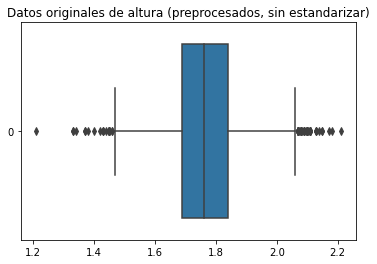

In [585]:
sns.boxplot(data=df_prep['height'], orient='h');
plt.title('Datos originales de altura (preprocesados, sin estandarizar)');

In [586]:
df_prep['height'].max()


2.21

Es una altura normal

In [587]:
df_prep[df_prep['height'] < 1.30] 

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age,rango
3578,817788274,Nancy Chepkwemoi,KEN,female,1993-10-08,1.21,47.0,athletics,0,0,0,23,joven


Lo verifiqué en internet y es su altura. Por lo tanto los outliers son valores reales y no erroes de carga.

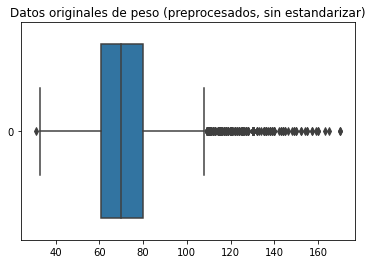

In [588]:
sns.boxplot(data=df_prep['weight'], orient='h');
plt.title('Datos originales de peso (preprocesados, sin estandarizar)');

In [589]:
df_prep[df_prep['weight'] > 150] 

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age,rango
5941,57339699,Behdad Salimikordasiabi,IRI,male,1989-12-08,1.92,170.0,weightlifting,0,0,0,27,joven
6491,306635640,Daniel Natea,ROU,male,1992-04-21,2.03,170.0,judo,0,0,0,24,joven
6500,285374253,Daniel Stahl,SWE,male,1992-08-27,2.00,155.0,athletics,0,0,0,24,joven
6536,933764156,Darrell Wesh,HAI,male,1992-01-21,1.83,160.0,athletics,0,0,0,24,joven
7063,344465413,Fernando Salas Manguis,ECU,male,1988-02-10,1.86,163.0,weightlifting,0,0,0,28,joven
7064,427314005,Fernando Saraiva Reis,BRA,male,1990-03-10,1.85,155.0,weightlifting,0,0,0,26,joven
7658,784382414,Ivan Emilianov,MDA,male,1977-02-19,2.02,165.0,athletics,0,0,0,39,mayor
8532,592699944,Lasha Talakhadze,GEO,male,1993-10-02,1.97,157.0,weightlifting,1,0,0,23,joven
9018,620850796,Mason Finley,USA,male,1990-10-07,2.04,157.0,athletics,0,0,0,26,joven
9902,208033661,Peter Nagy,HUN,male,1986-01-16,1.92,159.0,weightlifting,0,0,0,30,joven


Tiene sentido que los atletas de disciplinas como levantar pesas y judo tengan estos pesos. No puedo eliminarlos.

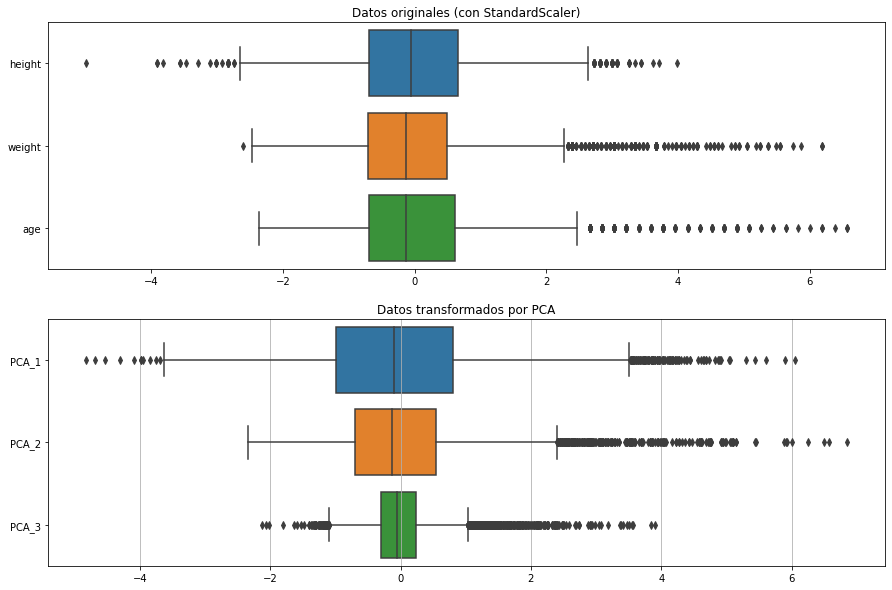

In [590]:
# Si grafico las tres variables numéricas que estoy evaluando
plt.figure(figsize=(15,10))

# en el primer plor como ariables trasnformadas por StandardScaler
plt.subplot(2,1,1)
sns.boxplot(data=df[features], orient='h');
plt.title('Datos originales (con StandardScaler)');

# Y ahora grafico las mismas tres variables pero transformadas por PCA
plt.subplot(2,1,2)
sns.boxplot(data=df_pca[['PCA_1', 'PCA_2', 'PCA_3']], orient='h');
plt.title('Datos transformados por PCA');
plt.grid(axis='x')

No queda tan claro en el gráfico que tengamos menos outliers

In [591]:
# Me fijo que pasa numéricamente
# Con los datos originales (con StandardScaler)
dfo = df[features]

def contar_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    outliers_bool = (df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))
    outliers = outliers_bool.sum(axis=0)
    return outliers

out = contar_outliers(dfo)

print(f'Cantidad de outliers originales :\n{out}\n')

# Con los datos transformados por PCA
dfpca = df_pca[['PCA_1', 'PCA_2', 'PCA_3']]

out = contar_outliers(dfpca)

print(f'Cantidad de outliers con PCA :\n{out}\n')

Cantidad de outliers originales :
height     92
weight    282
age       206
dtype: int64

Cantidad de outliers con PCA :
PCA_1    122
PCA_2    246
PCA_3    447
dtype: int64



Por lo tanto la transformación de PCA no redujo los outliers

In [592]:
df_prep.head()


,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age,rango
0,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0,30,joven
1,87689776,Aauri Lorena Bokesa,ESP,female,1988-12-14,1.80,62.0,athletics,0,0,0,28,joven
2,997877719,Ababel Yeshaneh,ETH,female,1991-07-22,1.65,54.0,athletics,0,0,0,25,joven
3,376068084,Abbey D'Agostino,USA,female,1992-05-25,1.61,49.0,athletics,0,0,0,24,joven
4,162792594,Abbey Weitzeil,USA,female,1996-12-03,1.78,68.0,aquatics,1,1,0,20,adolescente


In [593]:
# Que pasaba con los outliers en los datos orginales (raw)
dfo = df_prep[features]

out = contar_outliers(dfo)

print(f'Cantidad de outliers originales :\n{out}\n')


Cantidad de outliers originales :
height     92
weight    282
age       206
dtype: int64



El formato preprocesado con la escala original es el que menos outliers contenía. Cómo podemos tratarlos?


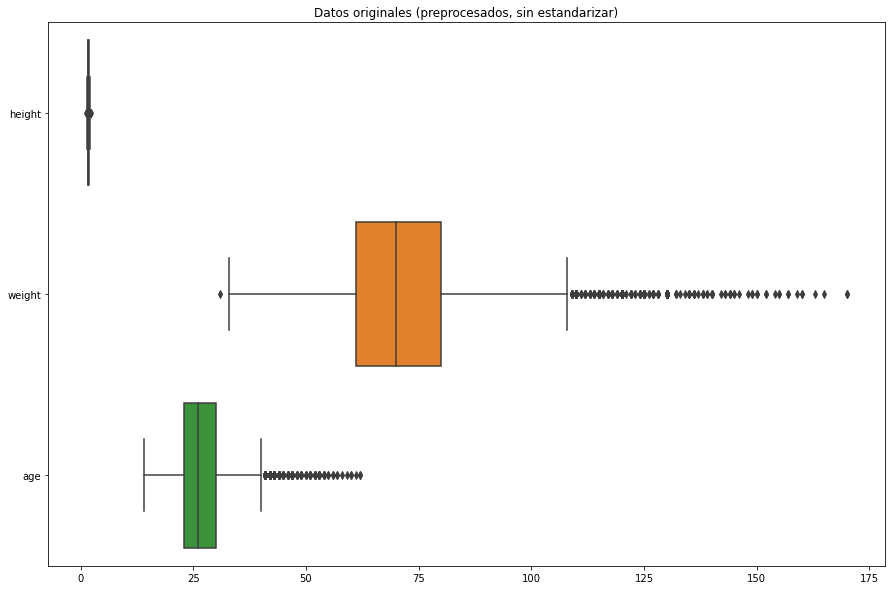

In [594]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_prep[features], orient='h');
plt.title('Datos originales (preprocesados, sin estandarizar)');

In [595]:
# Normalizo los datos por MinMaxScaler

atributos = df_prep[features]
mms = MinMaxScaler()

X = mms.fit_transform(atributos)
X

array([[0.47      , 0.17985612, 0.33333333],
       [0.59      , 0.22302158, 0.29166667],
       [0.44      , 0.16546763, 0.22916667],
       ...,
       [0.64      , 0.49640288, 0.22916667],
       [0.39      , 0.17985612, 0.27083333],
       [0.64      , 0.28057554, 0.20833333]])

In [596]:
# Cómo quedaron los outliers ahora?
dfo = pd.DataFrame(X, columns=features)

out = contar_outliers(dfo)

print(f'Cantidad de outliers normalizado con MinMaxScaler:\n{out}\n')

Cantidad de outliers normalizado con MinMaxScaler:
height     92
weight    282
age       206
dtype: int64



Al normalizar con MinMaxScaler sigo teniendo los mismos outliers que en los datos originales

In [597]:
# Normalizo los datos por normalize

atributos = df_prep[features]
atributos_norm = preprocessing.normalize(atributos)

atributos_norm

array([[0.02643516, 0.88117192, 0.47205639],
       [0.02644989, 0.91105175, 0.41144272],
       [0.0277175 , 0.90711825, 0.41996216],
       ...,
       [0.01794475, 0.96998629, 0.24249657],
       [0.02572773, 0.90047052, 0.43415543],
       [0.02499219, 0.94565048, 0.32422302]])

In [598]:
# Cómo quedaron los outliers ahora?
dfn = pd.DataFrame(atributos_norm, columns=features)

out = contar_outliers(dfn)

print(f'Cantidad de outliers normalizado con normalize:\n{out}\n')

Cantidad de outliers normalizado con normalize:
height    198
weight    427
age       193
dtype: int64



Con normalize tengo más outliers que antes

In [599]:
# Pruebo con RobustScaler
atributos = df_prep[features]
rsc = RobustScaler(quantile_range=(25, 75))

Xrsc = rsc.fit_transform(atributos)
Xrsc

array([[-0.53333333, -0.73684211,  0.57142857],
       [ 0.26666667, -0.42105263,  0.28571429],
       [-0.73333333, -0.84210526, -0.14285714],
       ...,
       [ 0.6       ,  1.57894737, -0.14285714],
       [-1.06666667, -0.73684211,  0.14285714],
       [ 0.6       ,  0.        , -0.28571429]])

In [600]:
# Cómo quedaron los outliers ahora?
dfrs = pd.DataFrame(Xrsc, columns=features)

out = contar_outliers(dfrs)

print(f'Cantidad de outliers normalizado con RobustScaler:\n{out}\n')

Cantidad de outliers normalizado con RobustScaler:
height     92
weight    282
age       206
dtype: int64



Hasta ahora estuve usando transformaciones lineales y no obtuve el resultado deseado. Voy a probar con una transformación no lineal. 

In [601]:
# Pruebo con PowerTransformer: transformación no lineal
atributos = df_prep[features]
ptr = PowerTransformer(method='box-cox')

Xptr = ptr.fit_transform(atributos)
Xptr

array([[-0.76414147, -1.11523187,  0.73288191],
       [ 0.32705394, -0.58951727,  0.38850484],
       [-1.04767993, -1.30854277, -0.20213944],
       ...,
       [ 0.76283992,  1.60220696, -0.20213944],
       [-1.53052567, -1.11523187,  0.20240277],
       [ 0.76283992,  0.00887886, -0.42276996]])

In [602]:
# Cómo quedaron los outliers ahora?
dfptr = pd.DataFrame(Xptr, columns=features)

out = contar_outliers(dfptr)

print(f'Cantidad de outliers normalizado con PowerTransformer:\n{out}\n')

Cantidad de outliers normalizado con PowerTransformer:
height     74
weight    117
age       118
dtype: int64



Esta vez sí hay una reducción de cantidad de outliers, casi a la mitad. Con esta transformación de datos tendré menos problemas con los outliers que en las transformaciones anteriores.

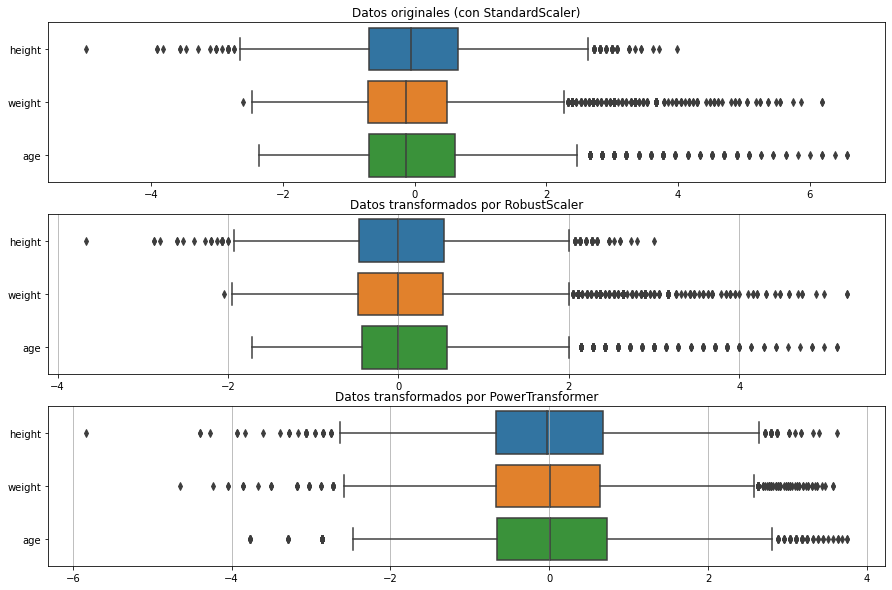

In [603]:
# Si grafico las tres variables numéricas que estoy evaluando
plt.figure(figsize=(15,10))

# en el primer plor como ariables trasnformadas por StandardScaler
plt.subplot(3,1,1)
sns.boxplot(data=df[features], orient='h');
plt.title('Datos originales (con StandardScaler)');

# Y ahora grafico las mismas tres variables pero transformadas por RobustScaler
plt.subplot(3,1,2)
sns.boxplot(data=dfrs[features], orient='h');
plt.title('Datos transformados por RobustScaler');
plt.grid(axis='x')

# Y ahora grafico las mismas tres variables pero transformadas por PowerTransformer
plt.subplot(3,1,3)
sns.boxplot(data=dfptr[features], orient='h');
plt.title('Datos transformados por PowerTransformer');
plt.grid(axis='x')